In [23]:
import pandas as pd
from matplotlib import pyplot as plt
file_path= "3.1 cost_revenue_clean.csv"
data= pd.read_csv(file_path)

In [24]:
data.head()

,production_budget_usd,worldwide_gross_usd
0,1000000,26
1,10000,401
2,400000,423
3,750000,450
4,10000,527


In [25]:
X = data.production_budget_usd
y = data.worldwide_gross_usd

X= pd.DataFrame(X)
y=pd.DataFrame(y)

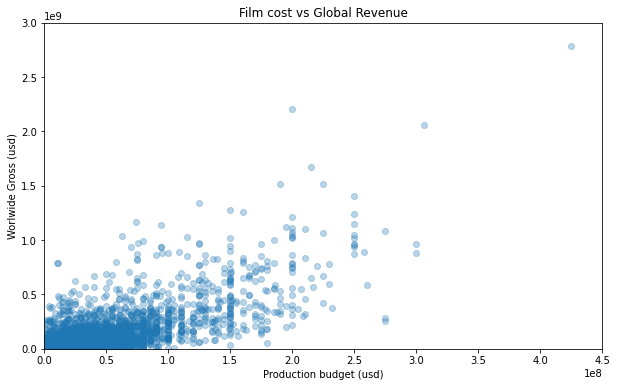

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(X,y,alpha=0.3)
plt.title('Film cost vs Global Revenue')
plt.xlabel('Production budget (usd)')
plt.ylabel('Worlwide Gross (usd)')
plt.ylim(0,3e9)
plt.xlim(0,4.5e8)
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [29]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

slope coefficient

In [30]:
model.coef_

array([[3.11150918]])

In [31]:
model.intercept_

array([-7236192.72913963])

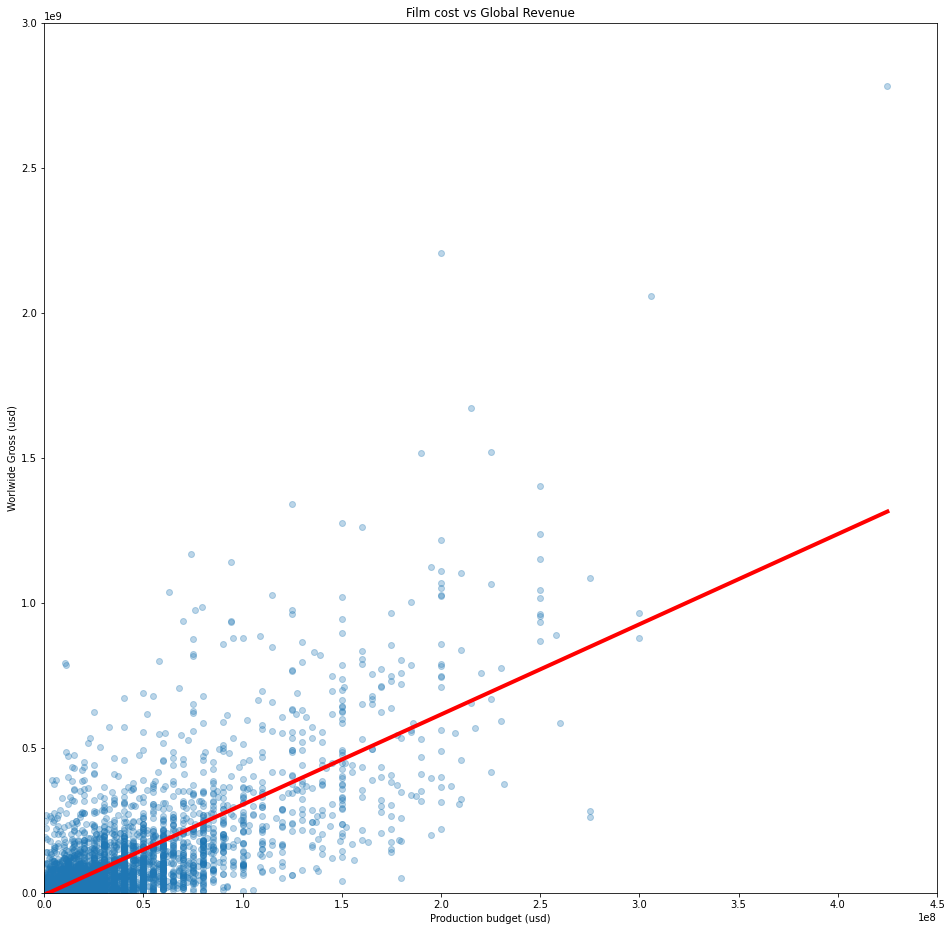

In [32]:
plt.figure(figsize=(16,16))
plt.scatter(X,y,alpha=0.3)
plt.plot(X,model.predict(X),color='red',linewidth=4)
plt.title('Film cost vs Global Revenue')
plt.xlabel('Production budget (usd)')
plt.ylabel('Worlwide Gross (usd)')
plt.ylim(0,3e9)
plt.xlim(0,4.5e8)
plt.show()

In [33]:
model.score(X,y)

0.5496485356985727

# polynomial Regression

In [44]:
from sklearn.preprocessing import PolynomialFeatures
main_X=X
poly = PolynomialFeatures(degree=3)
poly.fit_transform(X)

array([[1.0000000e+00, 1.0000000e+06, 1.0000000e+12, 1.0000000e+18],
       [1.0000000e+00, 1.0000000e+04, 1.0000000e+08, 1.0000000e+12],
       [1.0000000e+00, 4.0000000e+05, 1.6000000e+11, 6.4000000e+16],
       ...,
       [1.0000000e+00, 3.0600000e+08, 9.3636000e+16, 2.8652616e+25],
       [1.0000000e+00, 2.0000000e+08, 4.0000000e+16, 8.0000000e+24],
       [1.0000000e+00, 4.2500000e+08, 1.8062500e+17, 7.6765625e+25]])

In [36]:
poly_model = LinearRegression(fit_intercept=False)
poly_model.fit(X,y)

LinearRegression(fit_intercept=False)

In [37]:
poly_model.coef_

array([[3.02566434]])

In [38]:
poly_model.intercept_

0.0

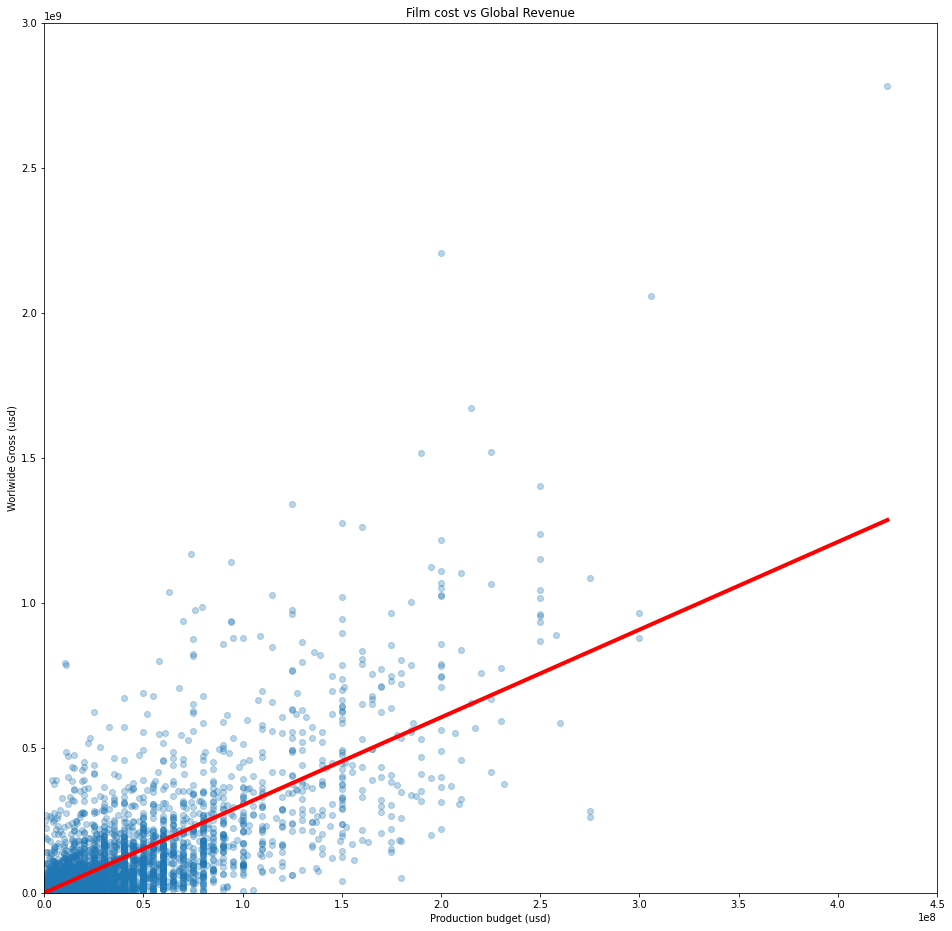

In [39]:
plt.figure(figsize=(16,16))
plt.scatter(X,y,alpha=0.3)
plt.plot(X,poly_model.predict(X),color='red',linewidth=4)
plt.title('Film cost vs Global Revenue')
plt.xlabel('Production budget (usd)')
plt.ylabel('Worlwide Gross (usd)')
plt.ylim(0,3e9)
plt.xlim(0,4.5e8)
plt.show()

In [40]:
poly_model.score(X,y)

0.5485768488885036

In [49]:
scores=[]
for i in range(3,6):
    temp=main_X
    poly=PolynomialFeatures(degree=i)
    poly.fit_transform(temp)
    my_model= LinearRegression(fit_intercept=False)
    my_model.fit(temp,y)
    scores.append(my_model.score(temp,y))

In [51]:
scores

[0.5485768488885036, 0.5485768488885036, 0.5485768488885036]